In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.tools.visualization import plot_histogram

In [11]:
#f(x)への入力変数xのbit長
n = 3

#オラクルの選択 ('b' : バランス関数　　'c'  :  定数関数)
oracle = 'c'

#定数関数の場合、出力0 or 1　を選択
if oracle == 'c':
    c = np.random.randint(2)

量子回路の作成

In [12]:
circuit = QuantumCircuit(n+1, n)
circuit.x(n)

for qubit in range(n+1):
    circuit.h(qubit)

#オラクルに応じたゲートUfを作用
if oracle == 'c':
    if c == 1:
        circuit.x(n)
    else:
        circuit.id(n)

else:
    for ctr in range(n):
        circuit.cx(ctr, n)

#上位n量子ビットにHゲートを作用
for qubit in range(n):
    circuit.h(qubit)

#状態の測定
for i in range(n):
    circuit.measure(i, i)

実行

{'000': 1024}


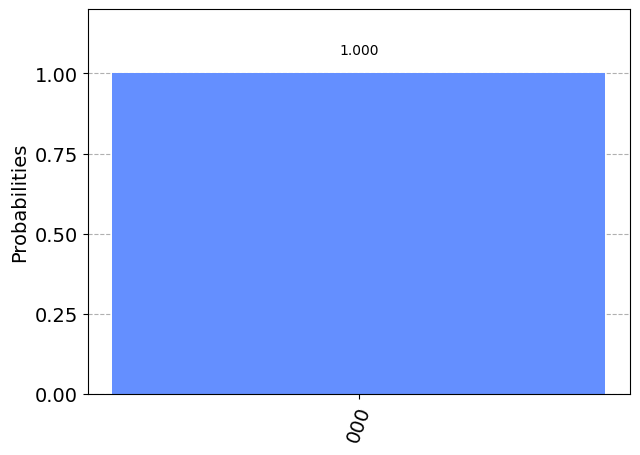

In [13]:
backend = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(circuit, backend=backend, shots=shots).result()
answer = results.get_counts()

print(answer)
plot_histogram(answer)